# Churn ML Models Notebooks

## Required Libraries 

In [21]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt 
import warnings 

## Importing the csv file i.e the dataset is stored as a dataframe

In [22]:
df=pd.read_csv('C:\\Users\\Kaushik\\OneDrive\\Ivy Data Science Notes\\Machine Learning Module\\Notebooks\\Churn pre ML data.csv')

In [23]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,COUNT
0,0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


## Dropping unwanted columns 

In [24]:
df=df.drop(columns=['Unnamed: 0','customerID','COUNT'])

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Statistical Tests 

#### Boxplot analysis for categorical vs continuous variables
When the target variable is categorical to compare it vs continuous variables we need to do ANOVA test

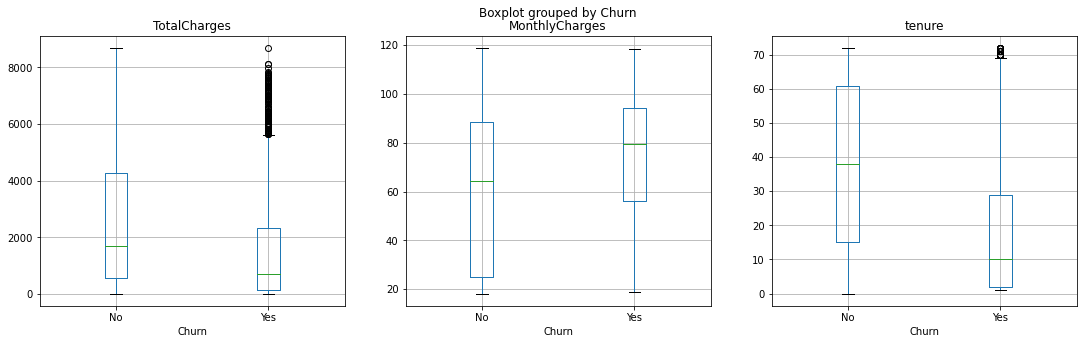

In [26]:
# Box plots for Categorical Target Variable "Churn" and continuous predictors
ContinuousColsList=['TotalCharges','MonthlyCharges','tenure']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='Churn', figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [27]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [28]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['MonthlyCharges','TotalCharges','tenure']
FunctionAnova(inpData=df, TargetVariable='Churn', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

MonthlyCharges is correlated with Churn | P-Value: 2.7066456068950115e-60
TotalCharges is NOT correlated with Churn | P-Value: nan
tenure is correlated with Churn | P-Value: 7.999057960610892e-205


['MonthlyCharges', 'tenure']

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

In [29]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=df['gender'], columns=df['Churn'])
CrossTabResult

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


# Chi square test - used for checking the relationship between categorical and continuous variable

In [30]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [31]:
CategoricalVariables=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Calling the function
FunctionChisq(inpData=df, 
              TargetVariable='Churn',
              CategoricalVariablesList= CategoricalVariables)

gender is NOT correlated with Churn | P-Value: 0.48657873605618596
SeniorCitizen is correlated with Churn | P-Value: 1.510066805092378e-36
Partner is correlated with Churn | P-Value: 2.1399113440759935e-36
Dependents is correlated with Churn | P-Value: 4.9249216612154196e-43
PhoneService is NOT correlated with Churn | P-Value: 0.3387825358066928
MultipleLines is correlated with Churn | P-Value: 0.0034643829548773
InternetService is correlated with Churn | P-Value: 9.571788222840544e-160
OnlineSecurity is correlated with Churn | P-Value: 2.6611496351768565e-185
OnlineBackup is correlated with Churn | P-Value: 2.0797592160865457e-131
DeviceProtection is correlated with Churn | P-Value: 5.505219496457244e-122
TechSupport is correlated with Churn | P-Value: 1.4430840279999813e-180
StreamingTV is correlated with Churn | P-Value: 5.528994485739024e-82
StreamingMovies is correlated with Churn | P-Value: 2.667756755723681e-82
Contract is correlated with Churn | P-Value: 5.863038300673391e-258


['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

<b>Finally selected Categorical variables:</b>

'SeniorCitizen','Partner',Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
'PaymentMethod','Churn'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

Instead of original "education" column, I am selecting the "education_num". Which represents the ordinal property of the data.

In [32]:
SelectedColumns=['SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
'PaymentMethod','MonthlyCharges','tenure']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,tenure
0,no,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,1
1,no,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,34
2,no,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,2
3,no,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,45
4,no,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,2


In [16]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## Categorical handling

In [ ]:
# Converting the binary nominal variable sex to numeric
DataForML['SeniorCitizen'].replace({'no':0, 'yes':1}, inplace=True)
DataForML['Dependents'].replace({'No':0, 'Yes':1}, inplace=True)
DataForML['Partner'].replace({'No':0, 'Yes':1}, inplace=True)
DataForML['MultipleLines'].replace({'No phone service':2, 'No':0,'Yes':1}, inplace=True)
DataForML['InternetService'].replace({'DSL':1, 'Fiber optic':2,'No':0}, inplace=True)
DataForML['OnlineSecurity'].replace({'No':0, 'Yes':1,'No internet service':2}, inplace=True)
DataForML['OnlineBackup'].replace({'No':0, 'Yes':1,'No internet service':2}, inplace=True)
DataForML['DeviceProtection'].replace({'No':0, 'Yes':1,'No internet service':2}, inplace=True)
DataForML['TechSupport'].replace({'No':0, 'Yes':1,'No internet service':2}, inplace=True)
DataForML['StreamingTV'].replace({'No':0, 'Yes':1,'No internet service':2}, inplace=True)
DataForML['StreamingMovies'].replace({'No':0, 'Yes':1,'No internet service':2}, inplace=True)
DataForML['Contract'].replace({'Month-to-month':0, 'One year':1,'Two year':2}, inplace=True)
DataForML['PaperlessBilling'].replace({'No':0, 'Yes':1,'No internet service':2}, inplace=True)
DataForML['PaymentMethod'].replace({'Electronic check':1, 'Mailed check':2,'Bank transfer (automatic)':3,'Credit card (automatic)':4}, inplace=True)
DataForML['StreamingTV'].replace({'No':0, 'Yes':1,'No internet service':2}, inplace=True)
DataForML['StreamingTV'].replace({'No':0, 'Yes':1,'No internet service':2}, inplace=True)







## Converting the nominal variable to numeric using get_dummies()

In [34]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Churn']=df['Churn']

# Printing sample rows
DataForML_Numeric.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,tenure,Churn
0,0,1,0,2,1,0,1,0,0,0,0,0,1,1,29.85,1,No
1,0,0,0,0,1,1,0,1,0,0,0,1,0,2,56.95,34,No
2,0,0,0,0,1,1,1,0,0,0,0,0,1,2,53.85,2,Yes
3,0,0,0,2,1,1,0,1,1,0,0,1,0,3,42.30,45,No
4,0,0,0,0,2,0,0,0,0,0,0,0,1,1,70.70,2,Yes


In [35]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data for ML 
Split the data into train and test. Usually the data is split 70:30 Ratio. 70% is used for training and 30 % is used for testing 

In [36]:
# Separate Target Variable and Predictor Variables
TargetVariable='Churn'
Predictors=['SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
'PaymentMethod','MonthlyCharges','tenure']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [37]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4930, 16)
(4930,)
(2113, 16)
(2113,)


# Logistic Regression

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1539
         Yes       0.69      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113

[[1390  246]
 [ 149  328]]
Accuracy of the model on Testing Sample Data: 0.81

Accuracy values for 10-fold Cross Validation:
 [0.7869221  0.81473961 0.79417748 0.82179314 0.77154617 0.78064484
 0.79905864 0.80102408 0.79018748 0.79853761]

Final Average Accuracy of the model: 0.8


# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

          No       0.81      0.91      0.86      1539
         Yes       0.64      0.41      0.50       574

    accuracy                           0.78      2113
   macro avg       0.72      0.66      0.68      2113
weighted avg       0.76      0.78      0.76      2113

[[1403  136]
 [ 336  238]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.76829323 0.78010516 0.74693211 0.78931586 0.75015302 0.74235736
 0.77243237 0.76211527 0.76526606 0.78365509]

Final Average Accuracy of the model: 0.77


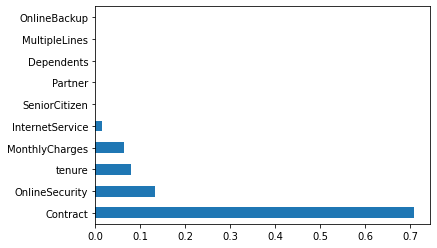

In [40]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting a Decision Tree

In [41]:
# Installing the required library for plotting the decision tree
!pip install dtreeplt

C:\Users\Kaushik\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


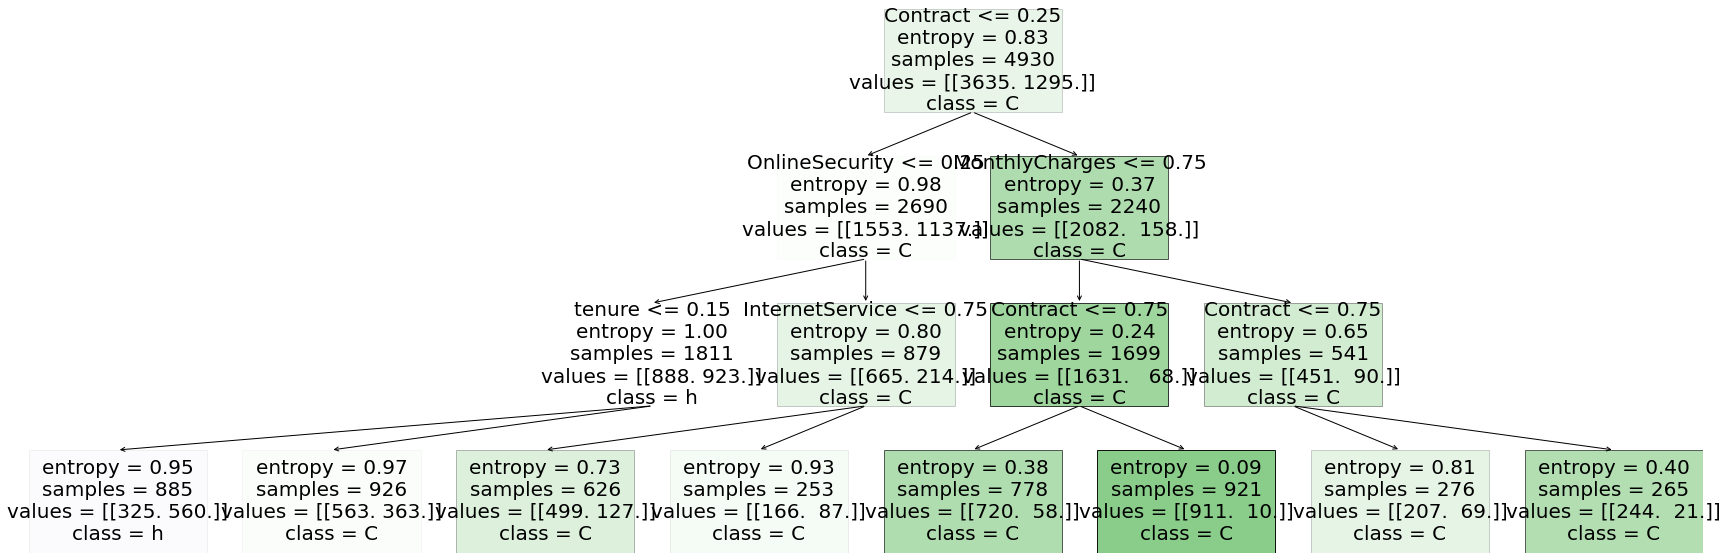

In [42]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)
# Double click on the graph to zoom in

## Random Forest

RandomForestClassifier(max_depth=4, n_estimators=200)
              precision    recall  f1-score   support

          No       0.81      0.94      0.87      1539
         Yes       0.71      0.40      0.51       574

    accuracy                           0.79      2113
   macro avg       0.76      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113

[[1444   95]
 [ 346  228]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.78791964 0.78131727 0.78181661 0.78990934 0.75773853 0.75802486
 0.79248814 0.76841685 0.7699456  0.79927718]

Final Average Accuracy of the model: 0.78


<AxesSubplot:>

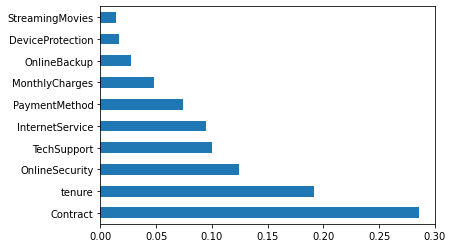

In [43]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=4, n_estimators=200,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## Plotting one of the Decision Trees in Random Forest

C:\Users\Kaushik\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


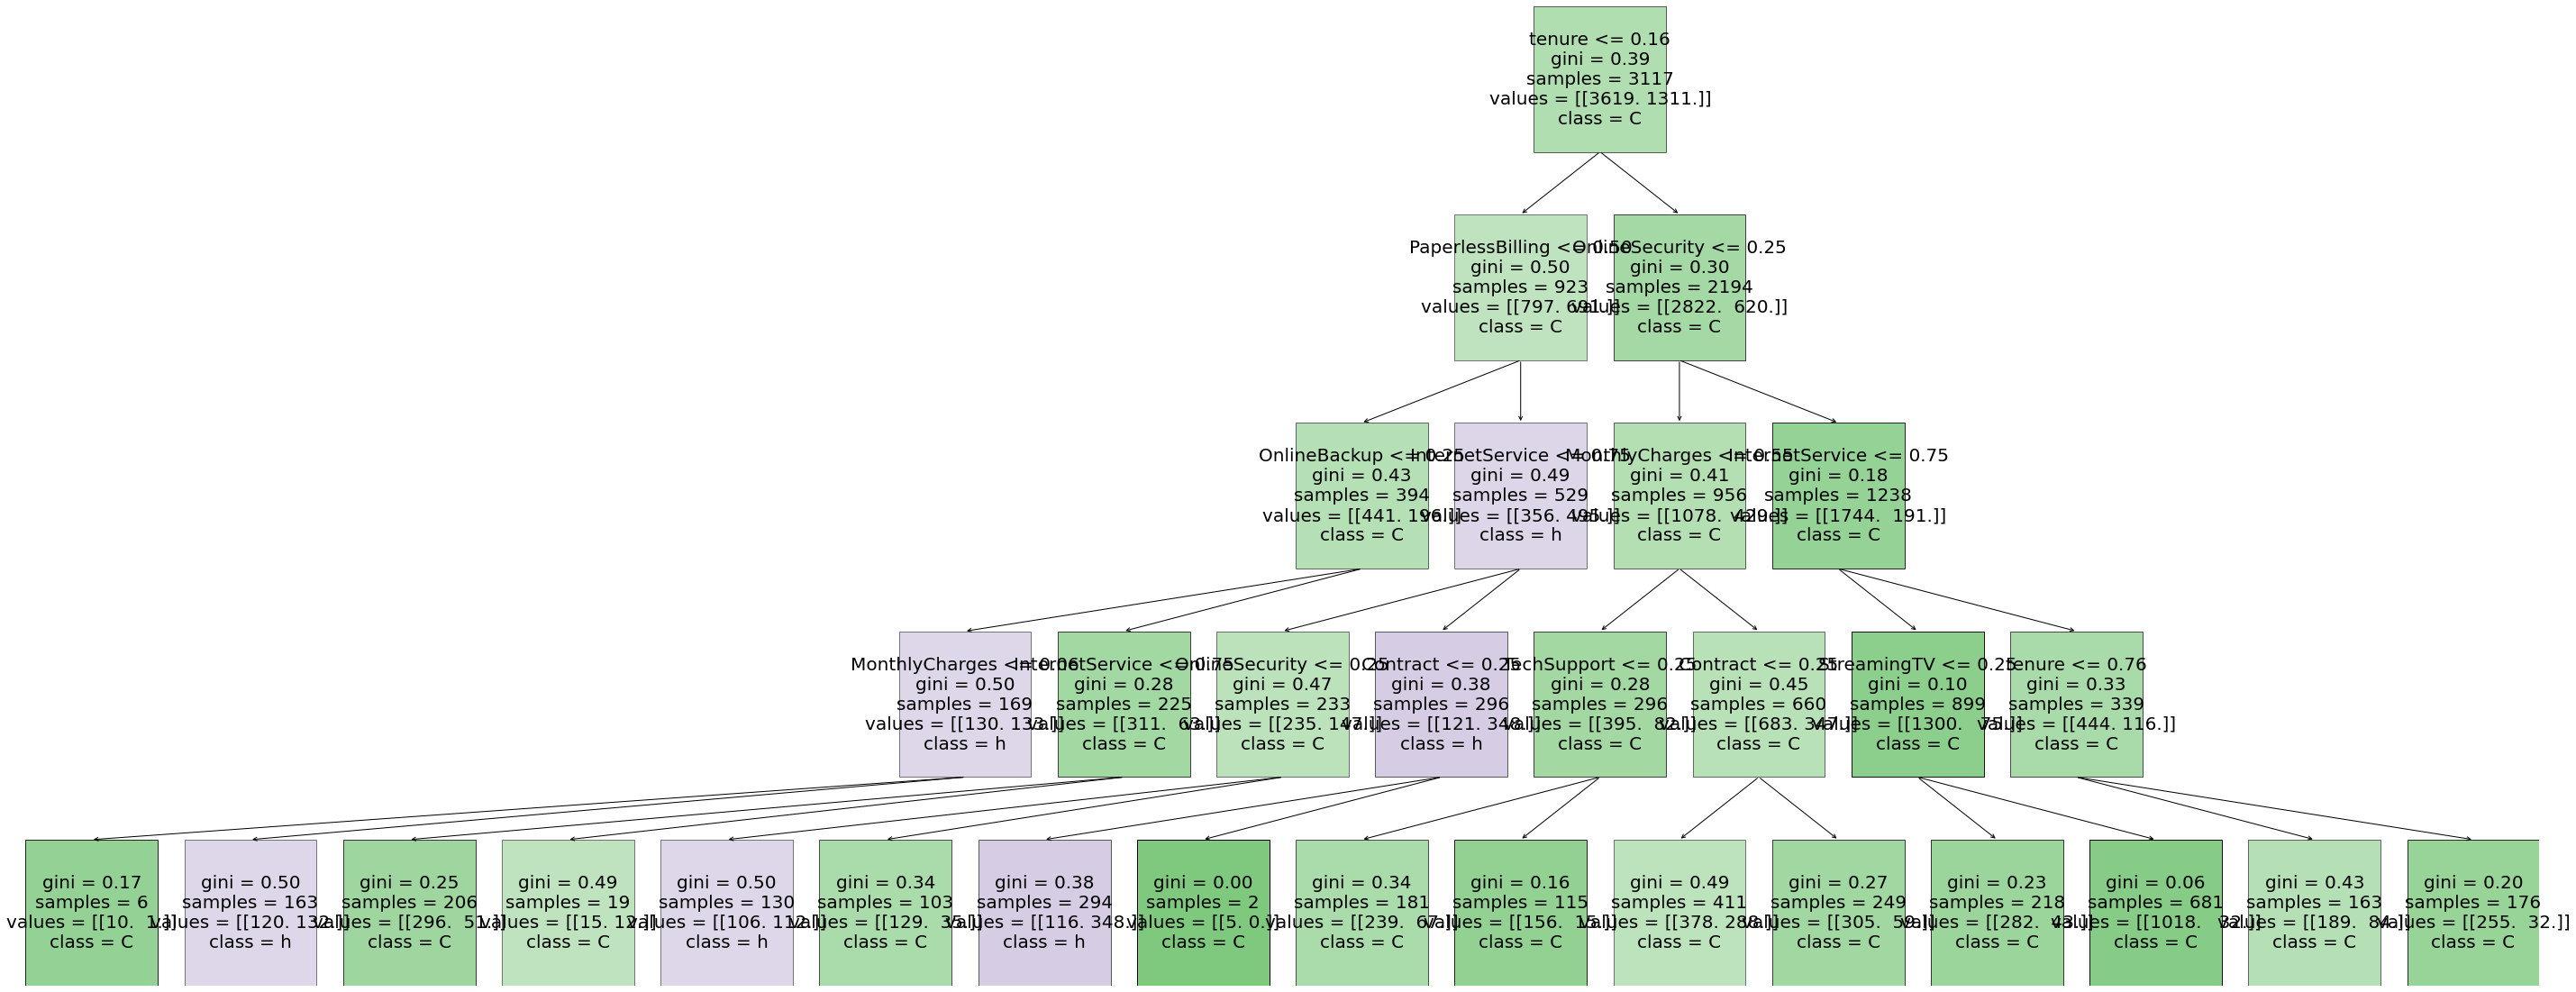

In [44]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,20)
# Double click on the graph to zoom in

## AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=100)
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1539
         Yes       0.68      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

[[1400  139]
 [ 280  294]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.8068132  0.80481474 0.78400832 0.80062138 0.78528223 0.78111937
 0.8212229  0.78248786 0.78057817 0.80285528]

Final Average Accuracy of the model: 0.79


<AxesSubplot:>

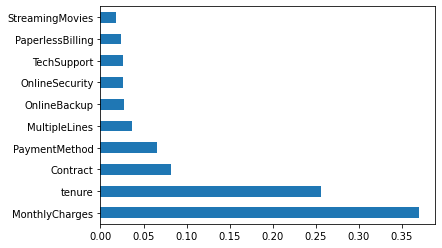

In [45]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.1)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### Plotting one of the Decision trees from Adaboost

C:\Users\Kaushik\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


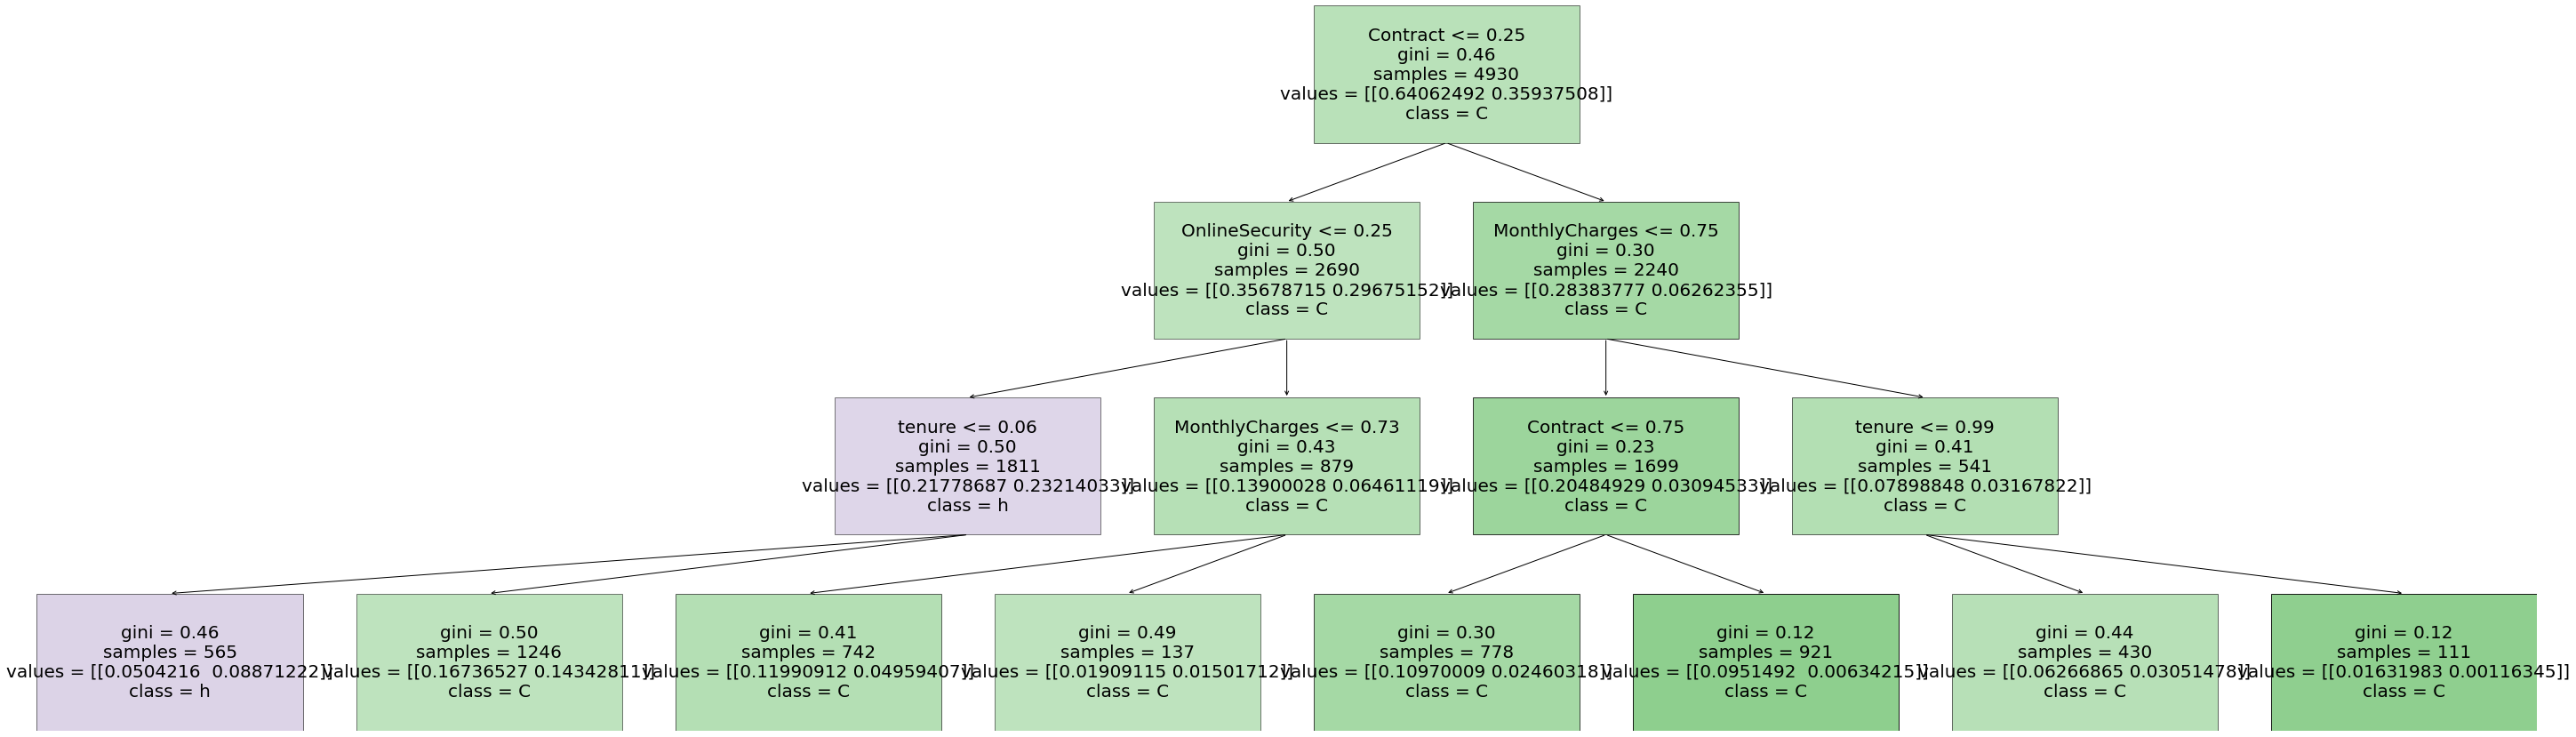

In [46]:
# PLotting 5th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## XGBoost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[14:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1539
         Yes       0.69      0.54      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113

[[1400  139]
 [ 266  308]]
Accuracy of the model on Testing Sample Data: 0.8
[14:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy values for 10-fold Cross Validation:
 [0.80266208 0.79983959 0.79345684 0.81276575 0.78424321 0.7777201
 0.82632948 0.78721917 0.78848315 0.80429945]

Final Average Accuracy of the model: 0.8


<AxesSubplot:>

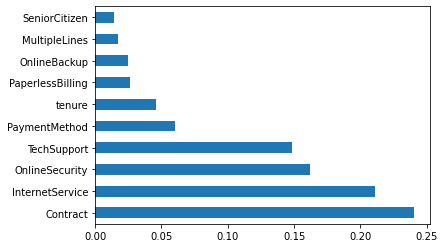

In [47]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### Plotting a single Decision tree out of XGBoost

<AxesSubplot:>

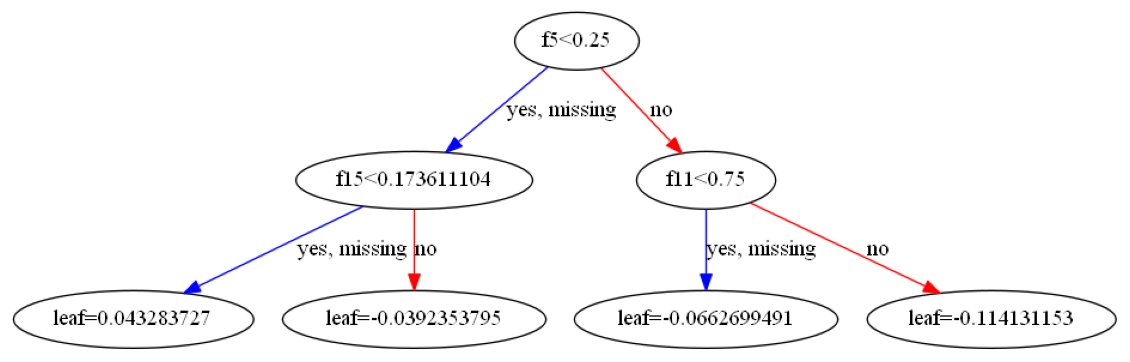

In [48]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## KNN

In [49]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

          No       0.80      0.92      0.85      1539
         Yes       0.62      0.37      0.46       574

    accuracy                           0.77      2113
   macro avg       0.71      0.64      0.66      2113
weighted avg       0.75      0.77      0.75      2113

[[1409  130]
 [ 363  211]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.74334752 0.74798136 0.74752687 0.74357032 0.73403278 0.73600465
 0.75566479 0.75426325 0.73028249 0.7660779 ]

Final Average Accuracy of the model: 0.75


## SVM

In [50]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=10, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel

%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=10, gamma=0.01)
              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1539
         Yes       0.69      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.80      0.81      0.81      2113

[[1396  143]
 [ 254  320]]
Accuracy of the model on Testing Sample Data: 0.81

Accuracy values for 10-fold Cross Validation:
 [0.79847432 0.80753131 0.7989043  0.8202769  0.77950824 0.78602409
 0.81366301 0.79712873 0.79218071 0.79389416]

Final Average Accuracy of the model: 0.8


## Naive Bayes

In [51]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

          No       0.92      0.66      0.77      1539
         Yes       0.48      0.86      0.62       574

    accuracy                           0.71      2113
   macro avg       0.70      0.76      0.69      2113
weighted avg       0.80      0.71      0.73      2113

[[1009  530]
 [  83  491]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.71554855 0.73284501 0.70350941 0.73913746 0.74049418 0.68698497
 0.71638297 0.7082258  0.71632969 0.71503366]

Final Average Accuracy of the model: 0.72


In [52]:
DataForML

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,tenure
0,0,1,0,2,1,0,1,0,0,0,0,0,1,1,29.85,1
1,0,0,0,0,1,1,0,1,0,0,0,1,0,2,56.95,34
2,0,0,0,0,1,1,1,0,0,0,0,0,1,2,53.85,2
3,0,0,0,2,1,1,0,1,1,0,0,1,0,3,42.30,45
4,0,0,0,0,2,0,0,0,0,0,0,0,1,1,70.70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,1,0,1,1,1,1,1,1,2,84.80,24
7039,0,1,1,1,2,0,1,1,0,1,1,1,1,4,103.20,72
7040,0,1,1,2,1,1,0,0,0,0,0,0,1,1,29.60,11
7041,1,1,0,1,2,0,0,0,0,0,0,0,1,2,74.40,4


# Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them. 

I am choosing <b>Decision Trees</b> as the final model since it is very fast for this data!

In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

## Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'age', 'education_num', 'hours_per_week','capital_gain', 'capital.loss', 'workclass', and 'marital_status'.
As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [63]:
# Separate Target Variable and Predictor Variables
TargetVariable='Churn'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
'PaymentMethod','MonthlyCharges','tenure']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(7043, 16)
(7043,)


In [64]:
DataForML

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,tenure
0,0,1,0,2,1,0,1,0,0,0,0,0,1,1,29.85,1
1,0,0,0,0,1,1,0,1,0,0,0,1,0,2,56.95,34
2,0,0,0,0,1,1,1,0,0,0,0,0,1,2,53.85,2
3,0,0,0,2,1,1,0,1,1,0,0,1,0,3,42.30,45
4,0,0,0,0,2,0,0,0,0,0,0,0,1,1,70.70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,1,0,1,1,1,1,1,1,2,84.80,24
7039,0,1,1,1,2,0,1,1,0,1,1,1,1,4,103.20,72
7040,0,1,1,2,1,1,0,0,0,0,0,0,1,1,29.60,11
7041,1,1,0,1,2,0,0,0,0,0,0,0,1,2,74.40,4


#### Step 1. Retraining the model using 100% data

In [65]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Training the model on 100% Data available
FinalDecisionTreeModel=clf.fit(X,y)

#### Cross validating the final model accuracy with less predictors

In [66]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalDecisionTreeModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.76829323 0.78010516 0.74693211 0.78931586 0.75015302 0.74235736
 0.77243237 0.76211527 0.76526606 0.78365509]

Final Average Accuracy of the model: 0.77


#### Step 2. Save the model as a serialized file which can be stored anywhere

In [67]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('FinalDecisionTreeModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalDecisionTreeModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Kaushik\OneDrive\Ivy Data Science Notes\Machine Learning Module\Notebooks


#### Step 3. Create a python function

In [69]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Converting the binary nominal variable sex to numeric
    InputData['SeniorCitizen'].replace({'no':0, 'yes':1}, inplace=True)
    InputData['Partner'].replace({'No':0, 'Yes':1}, inplace=True)
    InputData['Dependents'].replace({'no':0, 'yes':1}, inplace=True)
    InputData['MultipleLines'].replace({'No phone service':2,'No':0,'Yes':1}, inplace=True)
    InputData['InternetService'].replace({'DSL':1,'Fiber optic':2,'No':0}, inplace=True)
    InputData['OnlineSecurity'].replace({'No':0,'Yes':1,'No internet service':2}, inplace=True)
    InputData['OnlineBackup'].replace({'No':0,'Yes':1,'No internet service':2}, inplace=True)
    InputData['DeviceProtection'].replace({'No':0,'Yes':1,'No internet service':2}, inplace=True)
    InputData['TechSupport'].replace({'No':0,'Yes':1,'No internet service':2}, inplace=True)
    InputData['StreamingTV'].replace({'No':0,'Yes':1,'No internet service':2}, inplace=True)
    InputData['StreamingMovies'].replace({'No':0,'Yes':1,'No internet service':2}, inplace=True)
    InputData['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2},inplace=True)
    InputData['PaperlessBilling'].replace({'No':0,'Yes':1,'No internet service':2}, inplace=True)
    InputData['PaymentMethod'].replace({'Electronic check':1, 'Mailed check':2,'Bank transfer (automatic)':3,'Credit card (automatic)':4}, inplace=True) 
  
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','tenure']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalDecisionTreeModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictionResult)

In [101]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [93]:
# Calling the function for some loan applications
NewSampleData=pd.DataFrame(
data=[['yes','Yes','yes','No','DSL','No','No','Yes','Yes','No internet service','No','One year','No','Electronic check',58,10],
     ['yes','Yes','no','No','DSL','No','No','Yes','Yes','No internet service','No','One year','No','Electronic check',350,10],
     ['yes','No','no','No','DSL','No','No','Yes','Yes','No internet service','No','One year','No','Credit card (automatic)',250,5]
     ,['yes','No','no','No','Fiber optic','No','No','No','No','No','No','Month-to-month','No','Electronic check',250,5]],
columns=['SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','tenure'])
    
print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)


  SeniorCitizen Partner Dependents MultipleLines InternetService  \
0           yes     Yes        yes            No             DSL   
1           yes     Yes         no            No             DSL   
2           yes      No         no            No             DSL   
3           yes      No         no            No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             No           No              Yes         Yes   
1             No           No              Yes         Yes   
2             No           No              Yes         Yes   
3             No           No               No          No   

           StreamingTV StreamingMovies        Contract PaperlessBilling  \
0  No internet service              No        One year               No   
1  No internet service              No        One year               No   
2  No internet service              No        One year               No   
3                   No              No  Month-to

,Predicted Status
0,No
1,No
2,No
3,Yes
